In [1]:
import glob
import numpy as np

def load_graphs(path):
    data = {}
    count = 0
    for filename in glob.glob(f"{path}/*_graph.csv"):
        with open(filename, 'r') as file:
            for line in file:
                name, *graph = line.split(',')
                graph_parsed = [float(cell) for cell in graph]
                if not name in data:
                    data[name] = np.array([graph_parsed])
                else:
                    data[name] = np.vstack((data[name], graph_parsed))
        count += 1
    print(f"Loaded {count} participants from {path}")
    return data

In [2]:
human_graphs   = load_graphs("../data/graph/human")
random_graphs  = load_graphs("../data/graph/random")
model_graphs   = load_graphs("../data/graph/full_model")
no_tree_graphs = load_graphs("../data/graph/no_tree_bas")

Loaded 158 participants from ../data/graph/human
Loaded 158 participants from ../data/graph/random
Loaded 158 participants from ../data/graph/full_model
Loaded 157 participants from ../data/graph/no_tree_bas


In [3]:
import matplotlib.pyplot as plt

def plot_statistic(ax, included_graphs, series_key, y_axis_label, legend_anchor=(1, 0.3)):
    for graph in included_graphs:
        graph_data = graph["data"][series_key]
        ax.plot(np.arange(graph_data.shape[1]), np.nanmean(graph_data, axis=0),
                lw=2, marker='o', color=graph["color"], label=graph["label"])
    ax.set_xlabel('Number of pieces')
    ax.set_ylabel(y_axis_label)
    ax.legend(frameon=False, bbox_to_anchor=legend_anchor, loc='upper right')
    for item in (ax.get_xticklabels() + ax.get_yticklabels() + ax.get_legend().get_texts()):
        item.set_fontsize(15)
    for item in [ax.title, ax.xaxis.label, ax.yaxis.label]:
        item.set_fontsize(18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

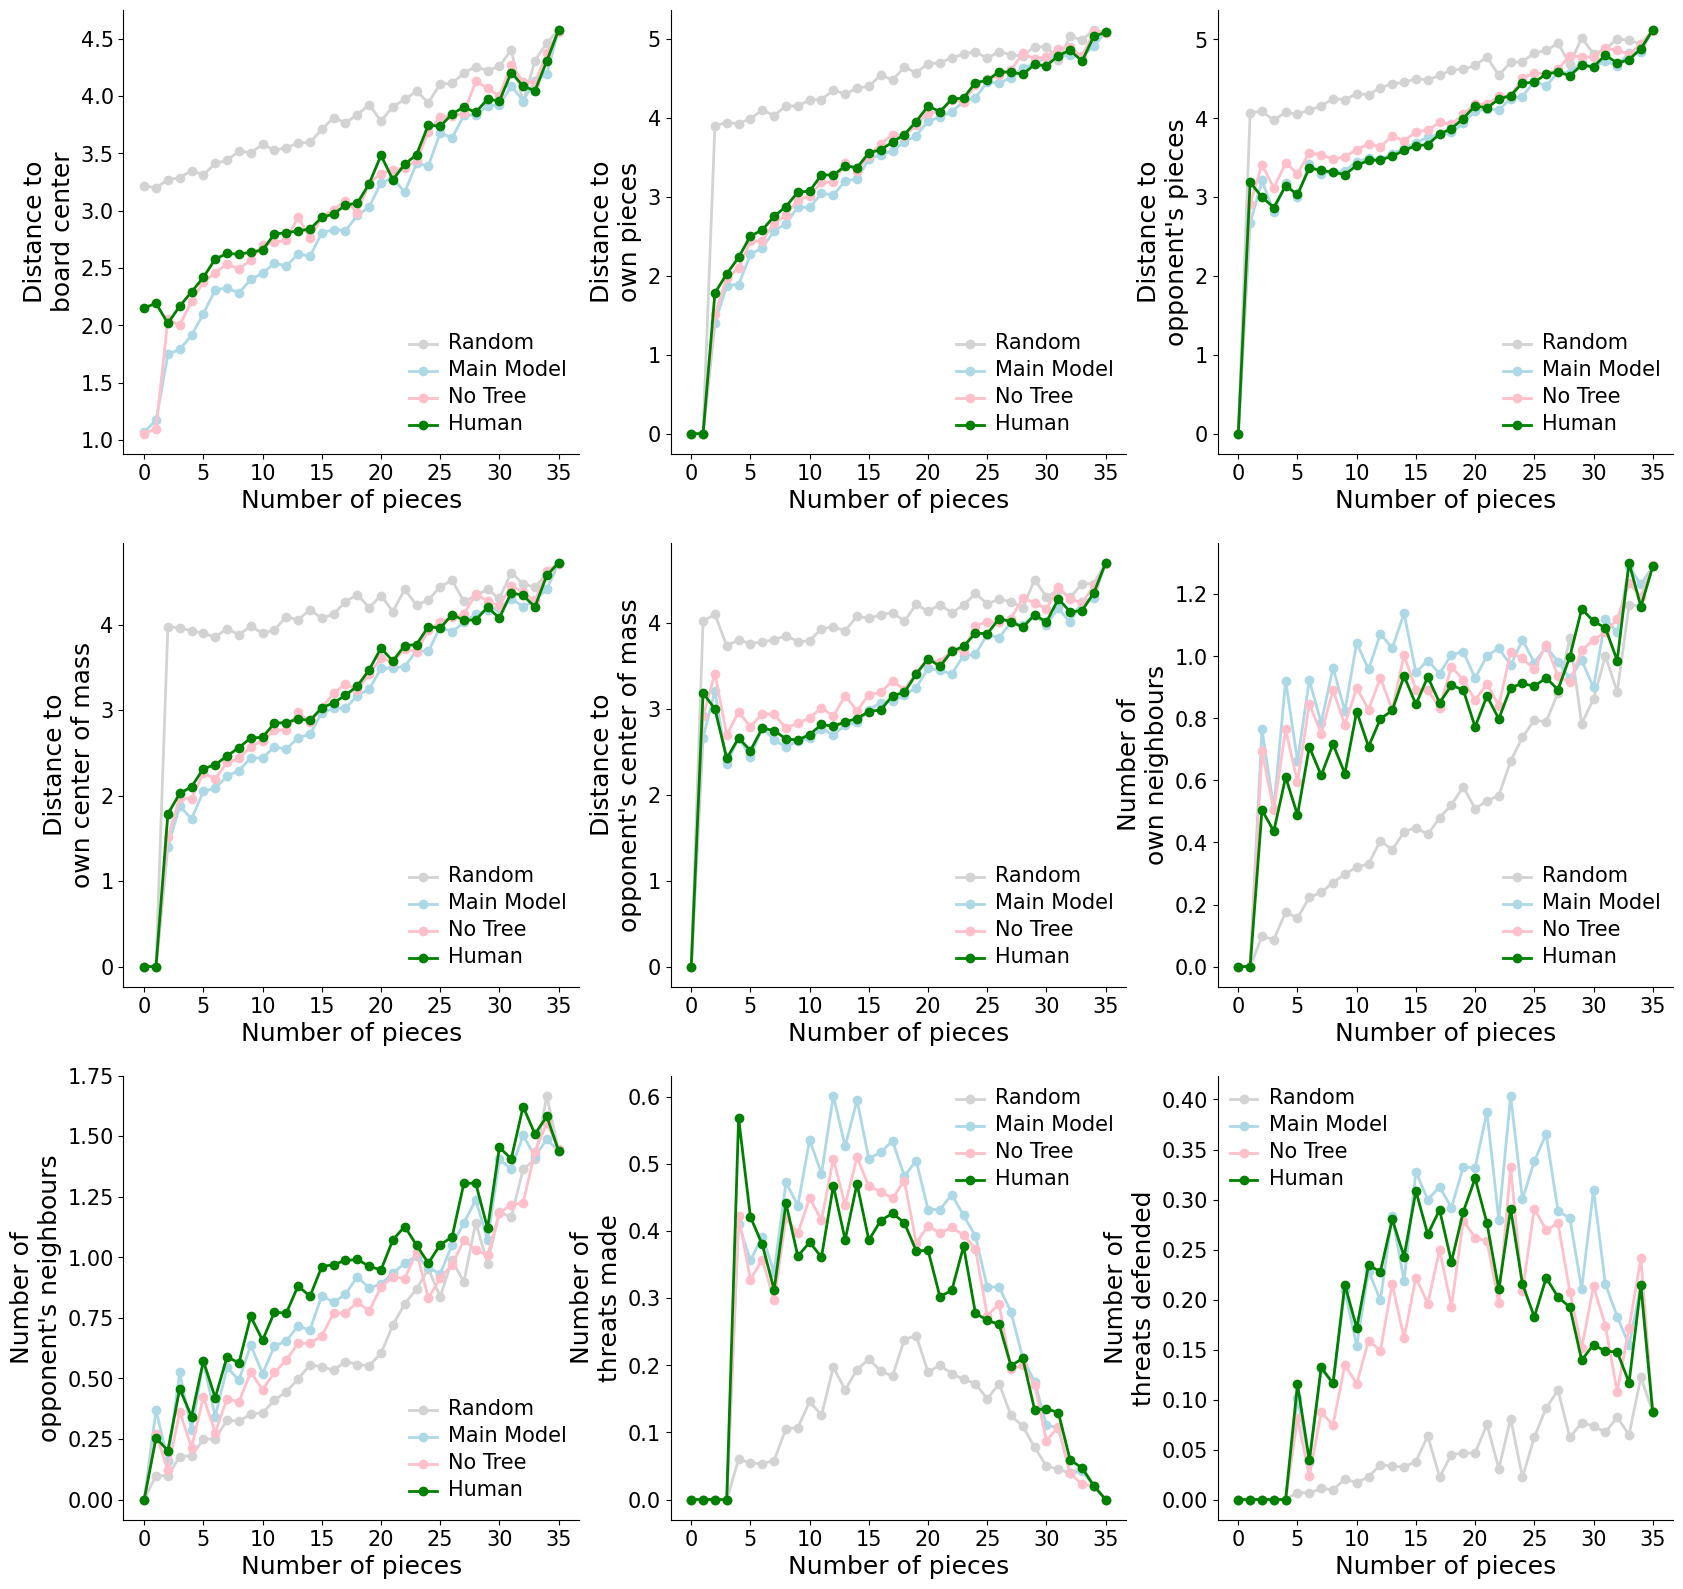

In [4]:
included_graphs = [
    {"data": random_graphs, "label": "Random", "color": "lightgrey"},
    {"data": model_graphs, "label": "Main Model", "color": "lightblue"},
    {"data": no_tree_graphs, "label": "No Tree", "color": "pink"},
    {"data": human_graphs, "label": "Human", "color": "green"}
]

fig, ax = plt.subplots(3, 3, figsize=(20, 20), dpi = 100)
plot_statistic(ax[0, 0], included_graphs, "board center", "Distance to\nboard center")
plot_statistic(ax[0, 1], included_graphs, "own pieces", "Distance to\nown pieces")
plot_statistic(ax[0, 2], included_graphs, "opponent's pieces", "Distance to\nopponent's pieces")
plot_statistic(ax[1, 0], included_graphs, "own center of mass", "Distance to\nown center of mass")
plot_statistic(ax[1, 1], included_graphs, "opponent's center of mass", "Distance to\nopponent's center of mass")
plot_statistic(ax[1, 2], included_graphs, "own neighbors", "Number of\nown neighbours")
plot_statistic(ax[2, 0], included_graphs, "opponent's neighbors", "Number of\nopponent's neighbours")
plot_statistic(ax[2, 1], included_graphs, "threats made", "Number of\nthreats made", (1, 1))
plot_statistic(ax[2, 2], included_graphs, "threats defended", "Number of\nthreats defended", (0.4, 1))

### 